In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1912046

Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 入力長

In [4]:
TIME_STEPS = 24
DIMENSION = 42

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(24, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 1008)              0         
                                                                 
 dense (Dense)               (None, 24)                24216     
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 24,499
Trainable params: 24,499
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/18 [==============================] - ETA: 0s - loss: 0.7083 - accuracy: 0.6429
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 1s 14ms/step - loss: 0.7083 - accuracy: 0.6429 - val_loss: 0.4821 - val_accuracy: 0.7756
Epoch 2/1000
15/18 [========================>.....] - ETA: 0s - loss: 0.4843 - accuracy: 0.7953
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 0.4797 - accuracy: 0.8079 - val_loss: 0.4303 - val_accuracy: 0.8504
Epoch 3/1000
18/18 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.8832
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 9ms/step - loss: 0.4308 - accuracy: 0.8832 - val_loss: 0.4012 - val_accuracy: 0.9514
Epoch 4/1000
13/18 [====================>.........] - ETA: 0s - lo

10/18 [===============>..............] - ETA: 0s - loss: 0.1415 - accuracy: 0.9945
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 10ms/step - loss: 0.1440 - accuracy: 0.9943 - val_loss: 0.1211 - val_accuracy: 0.9948
Epoch 28/1000
12/18 [===================>..........] - ETA: 0s - loss: 0.1402 - accuracy: 0.9909
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 8ms/step - loss: 0.1334 - accuracy: 0.9921 - val_loss: 0.1030 - val_accuracy: 0.9961
Epoch 29/1000
11/18 [=================>............] - ETA: 0s - loss: 0.1159 - accuracy: 0.9915
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.9930 - val_loss: 0.0889 - val_accuracy: 0.9948
Epoch 30/1000
18/18 [==============================] - ETA: 0s - loss: 0.1

18/18 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9934
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.9934 - val_loss: 0.0164 - val_accuracy: 0.9961
Epoch 54/1000
18/18 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9947
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 11ms/step - loss: 0.0283 - accuracy: 0.9947 - val_loss: 0.0180 - val_accuracy: 0.9948
Epoch 55/1000
12/18 [===================>..........] - ETA: 0s - loss: 0.0294 - accuracy: 0.9954
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 10ms/step - loss: 0.0266 - accuracy: 0.9961 - val_loss: 0.0171 - val_accuracy: 0.9948
Epoch 56/1000
10/18 [===============>..............] - ETA: 0s - loss: 0

10/18 [===============>..............] - ETA: 0s - loss: 0.0201 - accuracy: 0.9953
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 10ms/step - loss: 0.0219 - accuracy: 0.9965 - val_loss: 0.0147 - val_accuracy: 0.9961
Epoch 80/1000
11/18 [=================>............] - ETA: 0s - loss: 0.0277 - accuracy: 0.9915
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
18/18 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.0128 - val_accuracy: 0.9961
Epoch 80: early stopping


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[8.2162122e-04 9.1196010e-03 9.9005884e-01]
2


# 混同行列

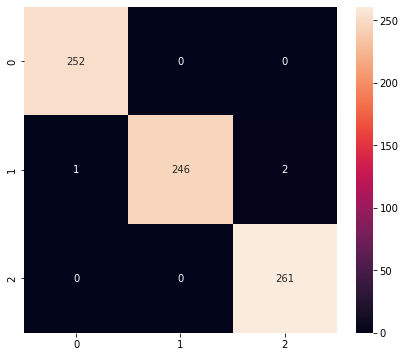

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      0.99      0.99       249
           2       0.99      1.00      1.00       261

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpt76s7xvb\assets


27440

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([   1, 1008]), 'shape_signature': array([  -1, 1008]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.210667e-04 9.116084e-03 9.900628e-01]
2
